In [1]:
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import normalize
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import numpy as np
import pandas as pd

X_raw = np.loadtxt("training_data/A549/rep2_new/ENCFF135JRM_all_matrix.tsv", delimiter='\t')
X_size = X_raw.shape[0]
y = np.zeros((X_size, ), dtype=np.uint8)

shuffle_ids = np.random.permutation(X_size)

for i in range(X_size/2):
    y[i] = 1

X = normalize(X_raw)
X = X[shuffle_ids]
y = y[shuffle_ids]

X_train = X[:X_size/2]
y_train = y[:X_size/2]

X_test = X[X_size/2:]
y_test = y[X_size/2:]

In [2]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
results = lr.predict(X_test)

In [3]:
diff = results - y_test
total = 0
false_p = 0
false_n = 0
for i in diff:
    if i == 255:
        false_n += 1
        total += 1
    if i == 1:
        false_p += 1
        total += i

print "Training set score =", lr.score(X_train, y_train)
print "Test set score =", lr.score(X_test, y_test)

print "False rate =", float(total)/(X_size/2)
print "False positive rate =", float(false_p)/(X_size/2)
print "False negative rate =",float(false_n)/(X_size/2)

Training set score = 0.859569515199
Test set score = 0.858388718329
False rate = 0.141611281671
False positive rate = 0.0624472858541
False negative rate = 0.0791639958166


In [4]:
coefs = lr.coef_
motif_list = pd.read_csv("human_pwm_ids_sorted.txt", sep=' ', header=None)
sort_ids = np.flip(np.argsort(coefs), 1)
motif_list['coeff'] = coefs.T
# print motif_list.iloc[sort_ids[0][:50], [1,2,3]]

save_results = motif_list.iloc[sort_ids[0], [1,2,3]]
save_results.to_csv("training_data/A549/rep2_new/coeff.tsv", sep='\t')

Score: 0.858776694444


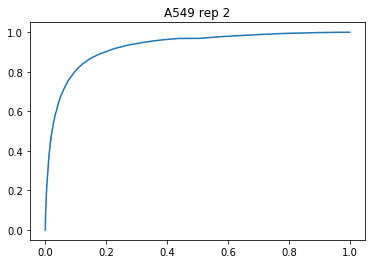

0.926878117451


In [6]:
clfcv = LogisticRegressionCV(cv=5)
clfcv.fit(X_train, y_train)
print "Score:", clfcv.score(X_test, y_test)

y_score = clfcv.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score[:,1])

plt.plot(fpr, tpr)
plt.title("A549 rep 2")
plt.show()
print roc_auc_score(y_test, y_score[:, 1])